In [1]:
using Dates
using Plots
using NCDatasets

# Load ClimateMachine.jl output NetCDF file

In [6]:
data_folder = "/central/scratch/bischtob/gcm_izf/netcdf/"
output_file = sort(readdir(data_folder, join=true))[1]
ds = NCDataset(output_file, "r");

In [7]:
# print out the names of files stored in netcdf output file
keys(ds)

16-element Array{String,1}:
 "long"
 "lat"
 "level"
 "time"
 "u"
 "v"
 "w"
 "rho"
 "temp"
 "pres"
 "thd"
 "et"
 "ei"
 "ht"
 "hi"
 "vort"

In [8]:
lon = ds["long"][:]
lat = ds["lat"][:]
altitude = ds["level"][:] / 1e3 # height in kilometers
time = ds["time"][:] # time in days
u = ds["u"][:]
v = ds["v"][:]
w = ds["w"][:]
T = ds["temp"][:]
θ = ds["thd"][:]
p = ds["pres"][:]
close(ds)

# Look at dimensions of fields (lon, lat, altitude, time)
println("dimensions (lon, lat, altitude, time): ", size(u))

dimensions (lon, lat, altitude, time): (37, 19, 101, 73)


In [5]:
# Have a quick look at maximum absolute initial velocities
maximum(abs.(u[:, :, :, 1])), maximum(abs.(v[:, :, :, 1])), maximum(abs.(w[:, :, :, 1]))

(27.899073566173513, 0.999918958749011, 0.0005485587621455321)

# Zonal slices

In [33]:
Dates.value(time[time_index]-time[1])/1e3

6997.183

slice at time: 7200.0s


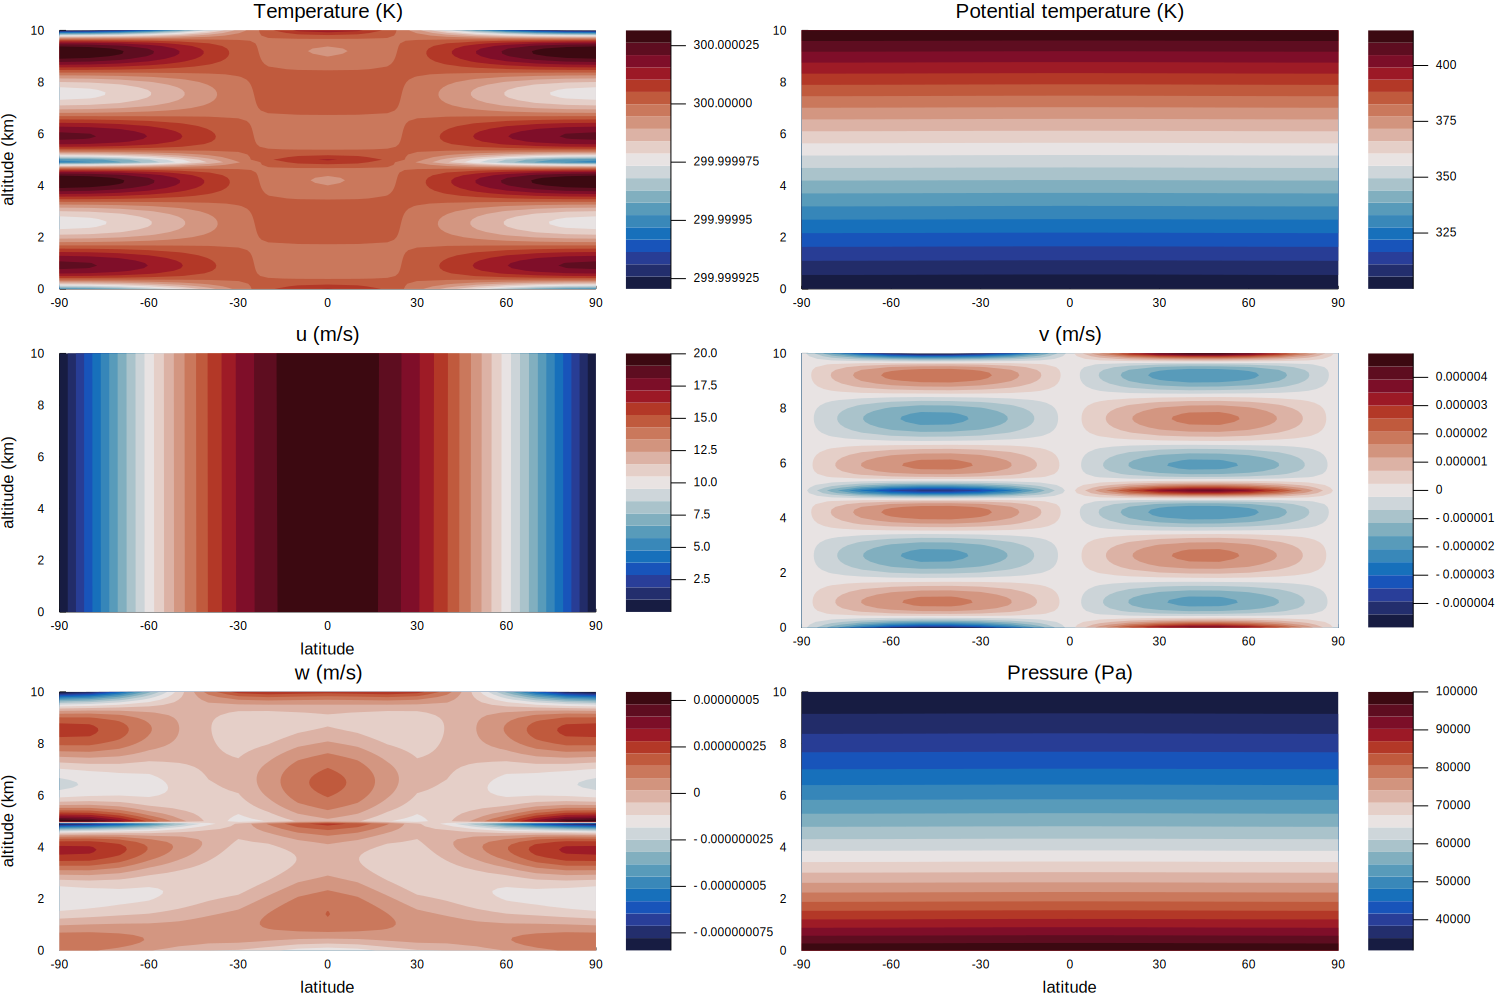

In [35]:
longitude_index = 1
time_index = 73
time_at_index = Dates.value(time[time_index]-time[1])/1e3
nlev = 20

ylab = "altitude (km)"
p1 = contourf(lat, altitude, T[longitude_index, :, :, time_index]', ylabel=ylab, color=:balance, levels=nlev, linewidth=0)
p2 = contourf(lat, altitude, θ[longitude_index, :, :, time_index]', color=:balance, levels=nlev, linewidth=0)
p3 = contourf(lat, altitude, u[longitude_index, :, :, time_index]', xlabel="latitude", ylabel=ylab, color=:balance, levels=nlev, linewidth=0)
p4 = contourf(lat, altitude, v[longitude_index, :, :, time_index]', color=:balance, levels=nlev, linewidth=0)
p5 = contourf(lat, altitude, w[longitude_index, :, :, time_index]', xlabel="latitude", ylabel=ylab, color=:balance, levels=nlev, linewidth=0)
p6 = contourf(lat, altitude, p[longitude_index, :, :, time_index]', xlabel="latitude", color=:balance, levels=nlev, linewidth=0)

println("slice at time: ", time_at_index, "s")
fig = plot(p1, p2, p3, p4, p5, p6, layout=(3,2), size=(1500, 1000), title=["Temperature (K)" "Potential temperature (K)" "u (m/s)"  "v (m/s)" "w (m/s)" "Pressure (Pa)"])

# Altitude slice

slice at altitude: 0.0km


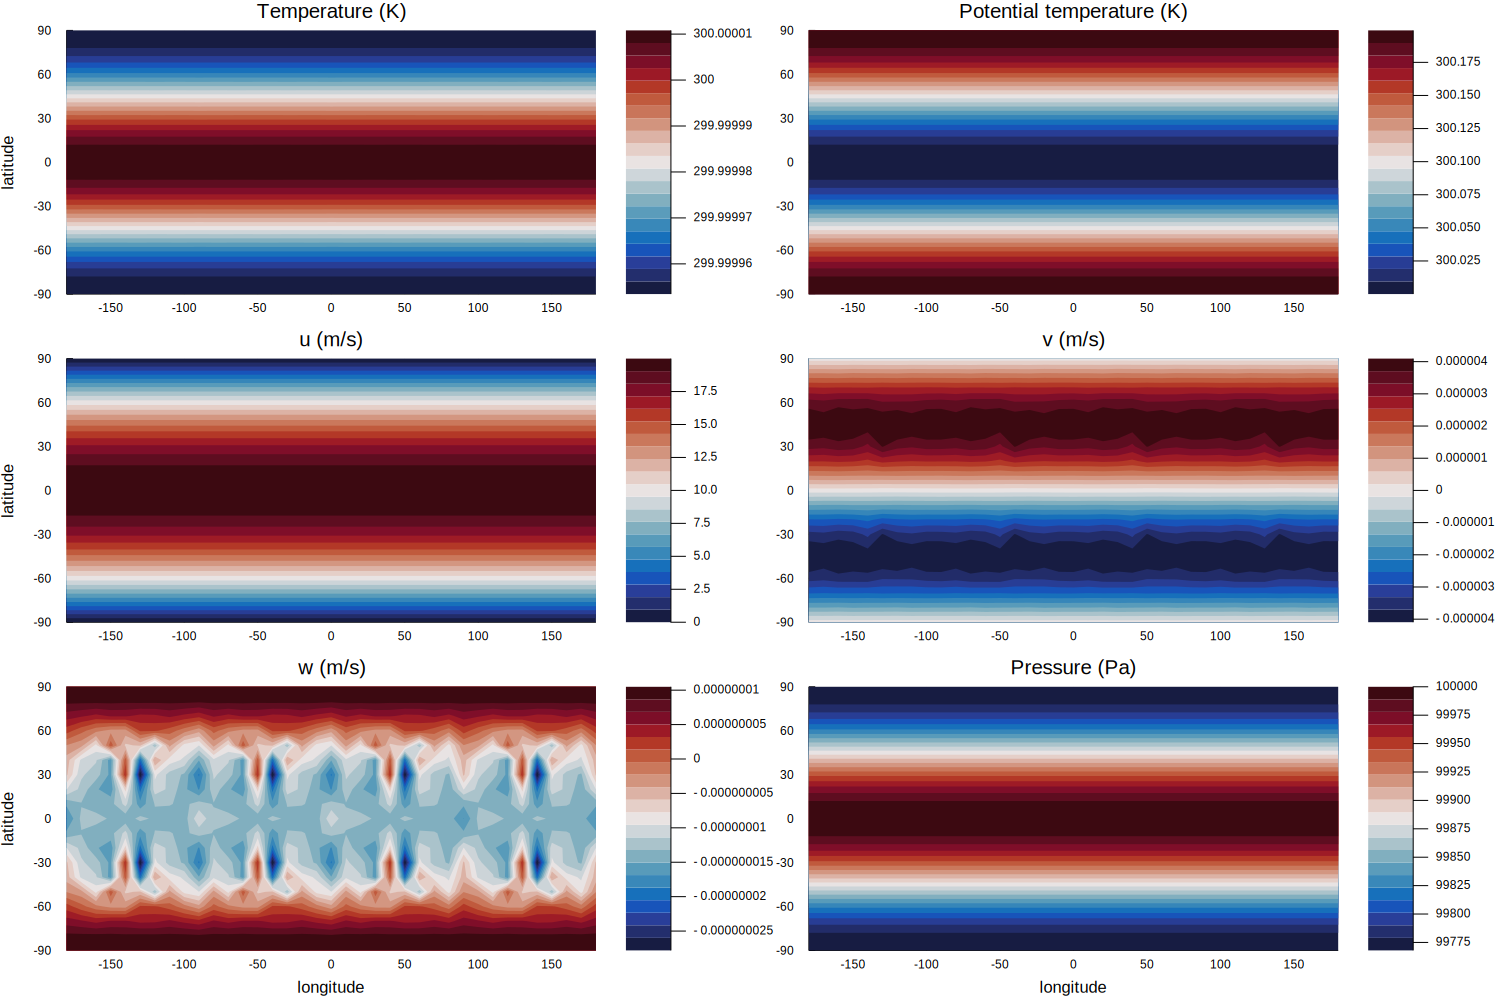

In [16]:
altitude_index = 1

ylab = "latitude"
p1 = contourf(lon, lat, T[:, :, altitude_index, time_index]', ylabel=ylab, color=:balance, levels=nlev, linewidth=0)
p2 = contourf(lon, lat, θ[:, :, altitude_index, time_index]', color=:balance, levels=nlev, linewidth=0)
p3 = contourf(lon, lat, u[:, :, altitude_index, time_index]', ylabel=ylab, color=:balance, levels=nlev, linewidth=0)
p4 = contourf(lon, lat, v[:, :, altitude_index, time_index]', color=:balance, levels=nlev, linewidth=0)
p5 = contourf(lon, lat, w[:, :, altitude_index, time_index]', xlabel="longitude", ylabel=ylab, color=:balance, levels=nlev, linewidth=0)
p6 = contourf(lon, lat, p[:, :, altitude_index, time_index]', xlabel="longitude", color=:balance, levels=nlev, linewidth=0)

println("slice at altitude: ", altitude[altitude_index], "km")
fig = plot(p1, p2, p3, p4, p5, p6, layout=(3,2), size=(1500, 1000), title=["Temperature (K)" "Potential temperature (K)" "u (m/s)" "v (m/s)" "w (m/s)" "Pressure (Pa)"])